# Machine Learning for Sepsis Pathway 

## Indiginous Impact Studies. 

Setup Libraries and plotting defaults. 

In [ ]:
import sys
import os
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
#import statsmodels.formula.api as smf
#from statsmodels.stats.anova import anova_lm


import re
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from pandasql import sqldf
import sqlalchemy
import pyodbc

import dfply as dfp
from dfply import *

import datetime
from datetime import *

import pyodbc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

import forestci as fci

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
import xgboost as xgb
from imblearn.over_sampling import SMOTENC
n_est=55

from hyperopt.pyll import scope
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

pd.set_option('display.max_columns', None)


import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow '
               }


plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(50,20,110,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 0,0),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),}


# Settings for Machine Learning Model 

In [ ]:
# Sepsis HeartFailure PE Pneumonia COPD UTI
# SepsisPneumonia
Diagnosis =   "Sepsis"
# Diagnosis = 'SepsisPneumonia'

DiagnosisString=Diagnosis+'Flag'

# DataSet1 All observations 
# DataSet2 Not including Oxygen Flow 

DataSet = 'DataSet30' 


# MLModel = 'randomforest'

print(Diagnosis,DiagnosisString)

# Load Data Files 

In [3]:
start_date =  '2023-01-01'  #dates[Facility][0]
end_date   =  '2024-01-01' #dates[Facility][1]

select_start_date = '2023-01-01'

DataReasons = "Training"

In [4]:
Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)


In [5]:
importlib.reload(MLUtilities)
Emergency_IPInfo_Complete_Numeric = MLUtilities.setNumeric(Emergency_IPInfo_Complete_Numeric)

In [6]:
Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1

# Setup Machine Learning Information 

In [7]:

# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


Diagnosis being investigated = SepsisFlag
Total Number of Cases = 320013
Number of SepsisFlag Cases  2761


In [8]:
df = Emergency_IPInfo_Complete_Numeric.copy()
df.name='{} diagnosis detected from full Diagnosis list, updated'.format(Diagnosis)
importlib.reload(MLUtilities)
# df = MLUtilities.setDefaults(df)

<module 'MLUtilities' from 'e:\\105GenMed-ML-OLd\\GenMed105-DxPrediction\\SnowFlakeVersion\\MLUtilities.py'>

In [9]:
dischargeList =  df.DISCHARGEDISPOSITION.unique().tolist()
dischargeList.sort()
dischargeList

['ED01 Discharged Home',
 'ED02 Admit as Inpatient',
 'ED03 Admit to EECU',
 'ED04 Did not wait',
 'ED05 Left before treatment complete',
 'ED06 Transfer to Other Hospital',
 'ED07 Home before bed available',
 'ED08 Nursing Home',
 'ED09 Died in ED',
 'ED11 Alternate Treatment',
 'ED12 Other',
 'ED13 Unknown']

In [10]:
df['DISCHARGEDISPOSITION'] = pd.Categorical(df['DISCHARGEDISPOSITION'], dischargeList)

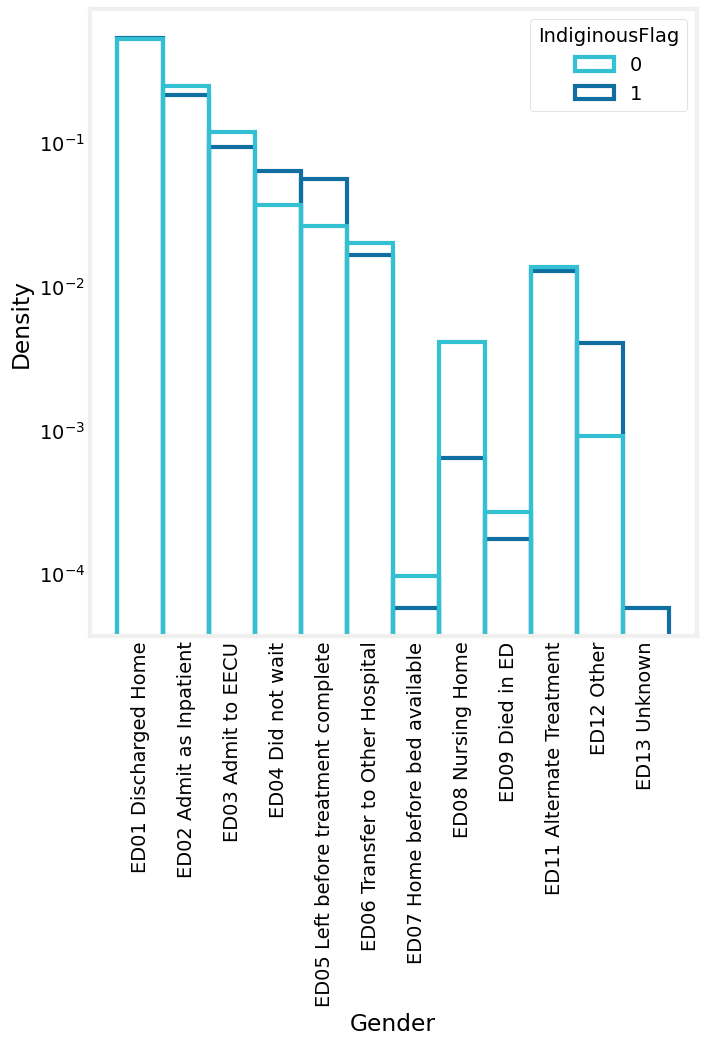

In [11]:
f, ax = plt.subplots(figsize=(7, 7))
f.tight_layout() 
ax.grid(False)

histGender = sns.histplot(data=df,x='DISCHARGEDISPOSITION', stat="density",common_norm=False,fill=False, linewidth=3 , hue="IndiginousFlag") #,binrange=(-0.5,5.5))
ax.set(xlabel='Discharge Srtatus')


plt.xticks(rotation=90)
plt.yscale("log")


In [12]:
# sns.catplot(data=df, x="DISCHARGEDISPOSITION", kind="count", hue="IndiginousFlag", stat="proportion",fill=False)
# plt.xticks(rotation=90)
# plt.yscale("log")


grouped_df = df.groupby(['DISCHARGEDISPOSITION','IndiginousFlag'],observed=False).size().reset_index(name='counts')
grouped_df['total'] = grouped_df.groupby('IndiginousFlag')['counts'].transform('sum')
grouped_df['proportion'] = grouped_df['counts'] / grouped_df['total']
grouped_df


,DISCHARGEDISPOSITION,IndiginousFlag,counts,total,proportion
0,ED01 Discharged Home,0,160700,302790,0.530731
1,ED01 Discharged Home,1,9251,17223,0.537131
2,ED02 Admit as Inpatient,0,75025,302790,0.247779
3,ED02 Admit as Inpatient,1,3708,17223,0.215294
4,ED03 Admit to EECU,0,36085,302790,0.119175
5,ED03 Admit to EECU,1,1619,17223,0.094002
6,ED04 Did not wait,0,11177,302790,0.036913
7,ED04 Did not wait,1,1089,17223,0.063229
8,ED05 Left before treatment complete,0,8012,302790,0.026461
9,ED05 Left before treatment complete,1,965,17223,0.056030


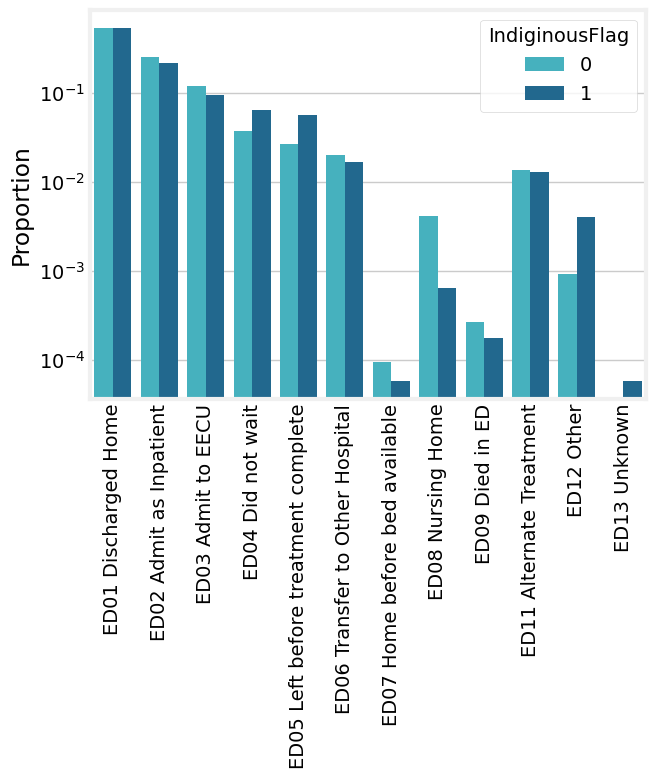

In [13]:
# Plot normalized countplot
sns.barplot(x="DISCHARGEDISPOSITION", y="proportion", hue="IndiginousFlag", data=grouped_df, )
plt.ylabel('Proportion')
plt.xlabel("")
plt.xticks(rotation=90)
plt.yscale("log")

In [23]:
diagnoses= df.EDDIAGNOSISCODEDESCRIPTION.unique()

In [24]:
(diagnoses)

array(['Pneumonia, unspecified', 'Other and unspecified abdominal pain',
       'Asthma, unspecified', ...,
       'Mental and behavioural disorders due to use of tobacco, residual and late-onset psychotic disorder',
       'Venom of other reptiles',
       'Other disorders of bone development and growth, other site'],
      dtype=object)

In [21]:
# for i in diagnoses:
#     if i is not None:
#         if ("chest" in i.lower()): 
#             print('-----*****------')
#             print(i)

In [17]:
# reasons = df.ED_VISIT_REASON.unique()


In [18]:
# len(reasons)

3804

In [ ]:
# for i in reasons:
#     try:
#         if ("chest pain" in i.lower() )  and ("no chest pain" not in i.lower()): 
#             print('-----*****------')
#             print(i)
#     except:
#         print(i)